'y' shape: (5000, 1). Unique elements in y: [ 1  2  3  4  5  6  7  8  9 10]
'X' shape: (5000, 401). X[0] shape: (401,)


E:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:38: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.


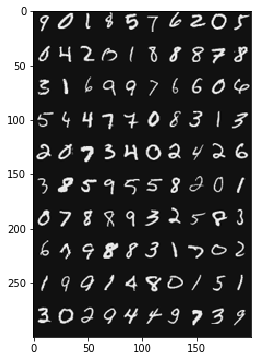

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as  pd
import scipy.io
import scipy.misc
import matplotlib.cm as cm
import random
from scipy.special import expit

datafile = "ex3data1.mat"
mat = scipy.io.loadmat(datafile)
X, y = mat['X'], mat['y']
X = np.insert(X, 0, 1, axis = 1)
print("'y' shape: %s. Unique elements in y: %s"%(mat['y'].shape,np.unique(mat['y'])))
print("'X' shape: %s. X[0] shape: %s"%(X.shape,X[0].shape))

def getDatumImg(row):
    width, height = 20, 20
    square = row[1:].reshape(width, height)
    return square.T

def displayData(indices_to_display = None):
    width, height = 20, 30
    nrows, ncols = 10, 10
    if (not indices_to_display):
        indices_to_display = random.sample(range(X.shape[0]), nrows*ncols)
    big_picture = np.zeros((height*nrows, width*ncols))
    
    irow, icol = 0, 0
    for idx in indices_to_display:
        if icol == ncols:
            irow += 1
            icol  = 0
        iimg = getDatumImg(X[idx])
        big_picture[irow*height:irow*height+iimg.shape[0],icol*width:icol*width+iimg.shape[1]] = iimg
        icol += 1
    fig = plt.figure(figsize=(6,6))
    img = scipy.misc.toimage( big_picture )
    plt.imshow(img,cmap = cm.Greys_r)
displayData()

def h(mytheta,myX): #Logistic hypothesis function
    return expit(np.dot(myX,mytheta))

#A more simply written cost function than last week, inspired by subokita:
def computeCost(mytheta,myX,myy,mylambda = 0.):
    m = myX.shape[0] #5000
    myh = h(mytheta,myX) #shape: (5000,1)
    term1 = np.log( myh ).dot( -myy.T ) #shape: (5000,5000)
    term2 = np.log( 1.0 - myh ).dot( 1 - myy.T ) #shape: (5000,5000)
    left_hand = (term1 - term2) / m #shape: (5000,5000)
    right_hand = mytheta.T.dot( mytheta ) * mylambda / (2*m) #shape: (1,1)
    return left_hand + right_hand #shape: (5000,5000)

